<a href="https://colab.research.google.com/github/julicarabaj/Tp-final-Redes-Neuronales/blob/main/TP_Chona_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Final: Redes Neuronales Convolucionales en TensorFlow
El objetivo de este modelo es la clasficación de distintas frutas a partir de imagenes.

In [27]:
!pip install tensorflow opencv-python matplotlib

In [2]:
pip install keras-visualizer

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras_visualizer import visualizer

In [4]:
# Directorio que contiene las carpetas de clases (apple, banana, etc.)
data_dir = '/content/dataset/'
# Verificar si el directorio ya existe antes de crearlo
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [5]:
classes = ["apple", "banana", "cherry", "chiko", "grapes", "kiwi", "mango", "orange", "strawberry"]

In [6]:
data_dir = '/content/data'
os.makedirs(data_dir, exist_ok=True)

train_dir = '/content/data/train'
os.makedirs(train_dir, exist_ok=True)

val_dir = '/content/data/validation'
os.makedirs(val_dir, exist_ok=True)

test_dir = '/content/data/test'
os.makedirs(test_dir, exist_ok=True)

In [7]:
# carpetas para cada clase en el conjunto de entrenamiento
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

# carpetas para cada clase en el conjunto de validacion
for class_name in classes:
    class_dir = os.path.join(val_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)


# carpetas para cada clase en el conjunto de testeo
for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

In [8]:
# definir la altura y el ancho de las imágenes
img_height = 255
img_width = 255

In [9]:
from keras import models
from keras import layers
from keras.models import Sequential

In [10]:
model = Sequential()

# Capas de convolución y pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capa Flatten para aplanar los datos
model.add(Flatten())

# Capas densas
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

Capa Conv2D (64 filtros, tamaño del kernel 3x3, activación ReLU):
Esta es la primera capa convolucional del modelo. La función Conv2D realiza convoluciones en la imagen de entrada utilizando 64 filtros de tamaño 3x3. La activación ReLU se aplica después de cada convolución para introducir no linealidades en la red.

Capa Conv2D (64 filtros, tamaño del kernel 3x3, activación ReLU):
Similar a la primera capa convolucional, esta capa realiza convoluciones adicionales con 64 filtros y activación ReLU.

Capa MaxPooling2D (tamaño de la ventana 2x2):
La capa de MaxPooling2D realiza un muestreo máximo para reducir las dimensiones espaciales de la representación, utilizando una ventana de 2x2. Esto ayuda a reducir la cantidad de parámetros y la carga computacional en la red.

Capa Conv2D (128 filtros, tamaño del kernel 3x3, activación ReLU):
Otra capa convolucional con 128 filtros y activación ReLU, permitiendo que la red capture patrones más complejos.

Capa Conv2D (128 filtros, tamaño del kernel 3x3, activación ReLU):
Una capa convolucional adicional, similar a la anterior, con 128 filtros y activación ReLU.

Capa MaxPooling2D (tamaño de la ventana 2x2):
Otra capa de MaxPooling2D que reduce las dimensiones espaciales antes de la siguiente capa convolucional.

Capa Conv2D (256 filtros, tamaño del kernel 3x3, activación ReLU):
Una tercera capa convolucional con 256 filtros y activación ReLU, aumentando la capacidad de representación de la red.

Capa MaxPooling2D (tamaño de la ventana 2x2):
Otra capa de MaxPooling2D que reduce aún más las dimensiones espaciales antes de la capa de aplanado.

Capa Flatten:
Esta capa aplana la salida de la capa anterior, convirtiendo los mapas de características en un vector unidimensional, necesario antes de pasar a las capas totalmente conectadas.

Capa Dropout (tasa de abandono de 0.5):
La capa Dropout apaga aleatoriamente el 50% de las unidades durante el entrenamiento para prevenir el sobreajuste.

Capa Dense (512 unidades, activación ReLU):
Una capa totalmente conectada con 512 unidades y activación ReLU, permitiendo la combinación lineal de características.

Capa Dense (5 unidades, activación softmax):
La capa de salida con 5 unidades (asumiendo un problema de clasificación con 5 clases) y activación softmax, que produce una distribución de probabilidad sobre las clases.

In [11]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [12]:
batch_size = 32
img_height, img_width = 224, 224

In [16]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(255, 255),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 288 images belonging to 3 classes.


In [17]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(255, 255),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 71 images belonging to 3 classes.


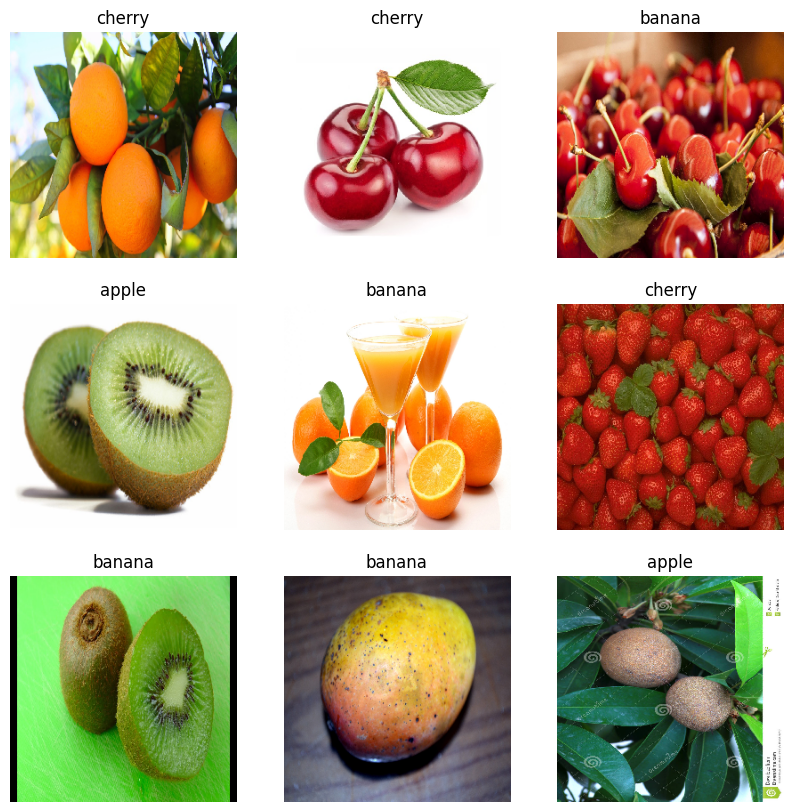

In [18]:
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(classes[np.argmax(sample_labels[i])])
    plt.axis("off")
plt.show()

In [20]:
from keras.preprocessing import image
import numpy as np

# Redimensionar las imágenes de muestra para que coincidan con las dimensiones esperadas por el modelo
resized_images = np.array([image.img_to_array(image.array_to_img(img, scale=False).resize((255, 255))) for img in sample_images])

# Realizar la predicción en las imágenes redimensionadas
predictions = model.predict(resized_images)

# Imprimir los resultados
for i in range(9):
    print(f"Predicted: {classes[np.argmax(predictions[i])]}, Actual: {classes[np.argmax(sample_labels[i])]}")


1/1 [==============================] - 3s 3s/step
Predicted: apple, Actual: cherry
Predicted: apple, Actual: cherry
Predicted: apple, Actual: banana
Predicted: apple, Actual: apple
Predicted: apple, Actual: banana
Predicted: apple, Actual: cherry
Predicted: apple, Actual: banana
Predicted: apple, Actual: banana
Predicted: apple, Actual: apple


In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 43s 239ms/step - loss: 1.7878 - accuracy: 0.2420 - val_loss: 1.6138 - val_accuracy: 0.2120
Epoch 2/30
100/100 [==============================] - 22s 215ms/step - loss: 1.5280 - accuracy: 0.2810 - val_loss: 1.5101 - val_accuracy: 0.3290
Epoch 3/30
100/100 [==============================] - 24s 243ms/step - loss: 1.4846 - accuracy: 0.3235 - val_loss: 1.5725 - val_accuracy: 0.2740
Epoch 4/30
100/100 [==============================] - 25s 247ms/step - loss: 1.4508 - accuracy: 0.3580 - val_loss: 1.5293 - val_accuracy: 0.3030
Epoch 5/30
100/100 [==============================] - 23s 224ms/step - loss: 1.4314 - accuracy: 0.3600 - val_loss: 1.4477 - val_accuracy: 0.3500
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 1.3435 - accuracy: 0.4445 - val_loss: 1.3824 - val_accuracy: 0.4140
Epoch 7/30
100/100 [==============================] - 25s 246ms/step - loss: 1.2881 - accuracy: 0.4640 - val_loss: 1.3115 - val_ac

In [26]:
from keras_visualizer import visualizer

# Visualizar la arquitectura del modelo y guardarla como un archivo PNG
visualizer(model, format='png', view=True, filename='model_architecture')


TypeError: ignored